# Visualizing Text Data Using Word Clouds
Adapted from https://www.numpyninja.com/post/nlp-text-data-visualization

## Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soham\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Preparing Dataset

In [29]:
dataset_train = pd.read_csv(r'data/reddit-train.csv')
dataset_test = pd.read_csv('data/reddit-test.csv')
frames = [dataset_train, dataset_test]
dataset = pd.concat(frames)

# Select text and label columns
text = dataset["text"]
label = dataset["label"]
subreddits = dataset["subreddit"]
data_dict = {'text': text, 'label': label, 'subreddit': subreddits}
dataset = pd.DataFrame(data_dict)
print(dataset)

                                                  text  label  \
0    He said he had not felt that way before, sugge...      1   
1    Hey there r/assistance, Not sure if this is th...      0   
2    My mom then hit me with the newspaper and it s...      1   
3    until i met my new boyfriend, he is amazing, h...      1   
4    October is Domestic Violence Awareness Month a...      1   
..                                                 ...    ...   
710  i have horrible vivid nightmares every night. ...      1   
711  Also I can't think about both of them without ...      1   
712  Furthermore, I told him before we got really s...      1   
713  Here's the link to my amazon wish list where t...      0   
714  How can I keep us protected? They have already...      1   

            subreddit  
0                ptsd  
1          assistance  
2                ptsd  
3       relationships  
4    survivorsofabuse  
..                ...  
710              ptsd  
711     relationships  
712

## Define functions to clean up data

In [30]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

## Segregate stress & non stress data 

In [31]:
mask = (dataset["label"] == 0)
non_stressed_df = dataset[mask]
mask = (dataset["label"]==1)
stressed_df = dataset[mask]
print(len(non_stressed_df))
print(len(stressed_df))

1696
1857


## Clean up data

In [32]:
non_stressed_df['text'] = non_stressed_df['text'].apply(clean_text)
non_stressed_df['text'] = non_stressed_df['text'].apply(remove_Stopwords)
non_stressed_df['text'] = non_stressed_df['text'].apply(lemmatize_text)


stressed_df['text'] = stressed_df['text'].apply(clean_text)
stressed_df['text'] = stressed_df['text'].apply(remove_Stopwords)
stressed_df['text'] = stressed_df['text'].apply(lemmatize_text)

non_stressed_df['Num_words_text'] = non_stressed_df['text'].apply(
    lambda x: len(str(x).split()))
stressed_df['Num_words_text'] = stressed_df['text'].apply(
    lambda x: len(str(x).split()))


<ipython-input-32-642ff3b70061>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['text'] = df_rating1['text'].apply(clean_text)
<ipython-input-32-642ff3b70061>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating1['text'] = df_rating1['text'].apply(remove_Stopwords)
<ipython-input-32-642ff3b70061>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

# Word Cloud of Non-Stressed Text

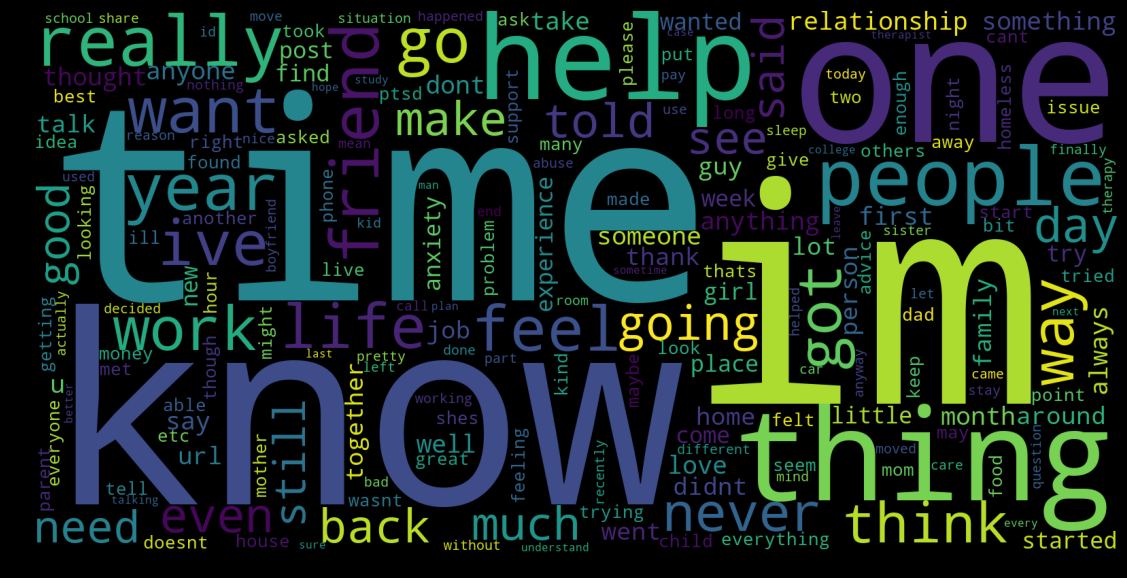

In [36]:
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(non_stressed_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

# Word Cloud of Stressed Text

(-0.5, 1599.5, 799.5, -0.5)

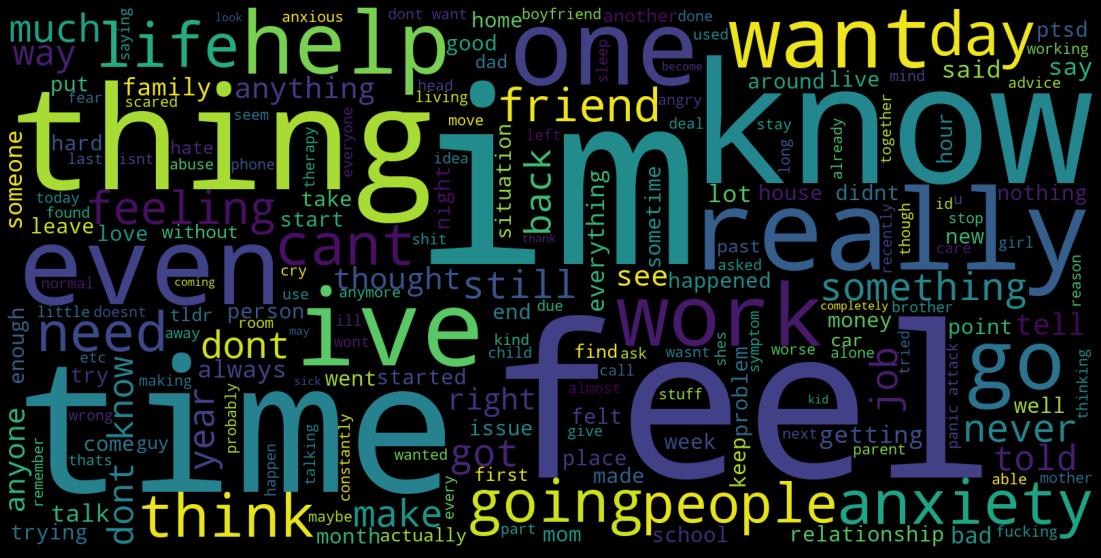

In [37]:
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(' '.join(stressed_df['text'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")